# Data Exploration


In this Notebook we will analyze the training dataset prepared in the previous Notebook, with the aim of identifying elements useful for Data Preprocessing.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

from CogniPredictAD.visualization import Visualizer

pd.set_option("display.max_rows", 116)
pd.set_option("display.max_columns", 40)
pd.set_option("display.max_info_columns", 40) 

## Loading the Dataset
Open the training dataset with Pandas.

In [ ]:
# Open the dataset with pandas
dataset = pd.read_csv("../data/pretrain.csv")
viz = Visualizer(dataset)
# Map numeric DX codes to diagnosis labels
dx_labels = {
    0: "CN",    # Cognitively Normal
    1: "EMCI",  # Early Mild Cognitive Impairment
    2: "LMCI",  # Late Mild Cognitive Impairment
    3: "AD"     # Alzheimer’s Disease
}
# Create a new column with the mapped labels
viz.dataset["DX_label"] = viz.dataset['DX'].map(dx_labels)
dataset.shape
display(dataset)

,DX,AGE,PTGENDER,PTEDUCAT,APOE4,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,TRABSCOR,FAQ,mPACCdigit,mPACCtrailsB,Ventricles,...,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,ABETA,TAU,PTAU,FDG,PTETHNICITY,MARRIED
0,2,77.1,0,16,1.0,2.5,3.00,5.00,1.0,28.0,47.0,5.0,7.0,63.63640,1.0,108.0,0.0,-4.84005,-4.499280,22503.0,...,2.250,2.11111,1.00000,1.0,1.33333,1.00,1.56410,2.375,2.11111,2.42857,2.60,2.83333,2.75000,2.46154,744.4,407.1,30.40,1.22283,4,1
1,0,59.9,1,16,1.0,0.0,0.00,0.00,0.0,30.0,71.0,2.0,0.0,0.00000,19.0,47.0,0.0,5.42702,5.167270,43728.0,...,1.000,1.00000,1.00000,1.0,1.00000,1.00,1.00000,1.000,1.00000,1.00000,1.00,1.00000,1.00000,1.00000,772.8,166.6,15.80,1.16197,5,1
2,3,77.5,1,12,2.0,8.0,19.33,30.33,10.0,22.0,19.0,1.0,4.0,100.00000,0.0,300.0,25.0,-18.90540,-18.905400,109900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.8,212.4,18.56,NaN,6,1
3,2,82.1,1,20,0.0,1.5,13.00,21.00,8.0,26.0,35.0,1.0,6.0,85.71430,4.0,63.0,0.0,-7.95749,-7.967110,38990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1717.0,396.2,34.68,1.11913,6,0
4,0,83.3,0,17,NaN,0.0,2.33,5.33,2.0,27.0,57.0,7.0,1.0,7.14286,13.0,98.0,3.0,-1.94841,-2.099850,73131.9,...,1.250,1.33333,1.00000,1.0,1.33333,1.00,1.18421,1.375,1.11111,1.66667,1.00,1.83333,1.25000,1.36842,NaN,NaN,NaN,NaN,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,0,72.4,0,18,1.0,0.0,4.00,4.00,0.0,30.0,42.0,7.0,2.0,18.18180,11.0,52.0,0.0,2.22837,2.530720,42526.0,...,1.500,2.33333,1.28571,1.0,2.50000,1.25,1.71795,1.250,1.00000,1.20000,1.00,1.33333,1.50000,1.18919,1159.0,190.6,15.71,1.41610,6,0
1930,3,72.7,0,12,1.0,7.0,22.00,29.00,6.0,26.0,34.0,-1.0,6.0,100.00000,5.0,67.0,18.0,-9.28099,-6.698780,30697.0,...,1.500,1.00000,1.14286,1.0,1.00000,1.00,1.12821,3.250,2.33333,2.42857,3.20,3.00000,3.50000,2.87179,568.8,430.1,46.04,1.26852,6,1
1931,0,70.5,0,17,0.0,0.0,19.00,23.00,4.0,29.0,31.0,4.0,3.0,42.85710,10.0,300.0,0.0,-2.30539,-5.033500,16297.0,...,1.125,1.11111,1.00000,1.0,1.00000,1.00,1.05128,1.000,1.00000,1.00000,1.00,1.00000,1.00000,1.00000,1415.0,131.6,10.84,1.45617,6,1
1932,0,84.9,1,12,0.0,0.5,9.00,16.00,6.0,30.0,27.0,1.0,4.0,80.00000,13.0,65.0,0.0,-1.42719,-0.736856,39281.0,...,2.000,2.00000,2.00000,2.0,1.50000,2.00,1.92105,1.625,1.22222,1.28571,1.25,1.00000,1.66667,1.32432,NaN,NaN,NaN,1.31888,6,0


## Introductory Data Exploration

In this section we will show some statistics regarding the data.

| Attribute             | Description                                                                        | Category              | Type        |
|:----------------------|:-----------------------------------------------------------------------------------|:----------------------|:------------|
| DX                    | Clinical diagnosis at the time of visit: CN, SMC, EMCI, LMCI, AD                   | Diagnosis             | Integer     |
| AGE                   | Participant’s age at time of visit                                                 | Demographics          | Float       |
| PTGENDER              | Participant"s gender (Male/Female)                                                 | Demographics          | Integer     |
| PTEDUCAT              | Years of formal education completed                                                | Demographics          | Integer     |
| MARRIED               | Indicates whether a patient is married at the time of the visit                    | Demographics          | Integer     |
| APOE4                 | Number of APOE ε4 alleles (0, 1, or 2), a genetic risk factor for Alzheimer’s      | Demographics          | Integer     |
| ABETA                 | CSF β-amyloid (Aβ42) concentration in pg/mL                                        | Biomarkers            | Float       |
| TAU                   | CSF total tau protein concentration                                                | Biomarkers            | Float       |
| PTAU                  | CSF phosphorylated tau concentration                                               | Biomarkers            | Float       |
| FDG                   | FDG PET SUVR – brain glucose metabolism                                            | Biomarkers            | Float       |
| CDRSB                 | Clinical Dementia Rating - Sum of Boxes (0–18, higher = worse)                     | Clinical Scores       | Float       |
| ADAS11                | ADAS-Cog 11-item total score (higher = worse)                                      | Clinical Scores       | Integer     |
| ADAS13                | ADAS-Cog 13-item total score (higher = worse)                                      | Clinical Scores       | Integer     |
| ADASQ4                | Word Recall from ADAS-Cog (0–10, lower = worse)                                    | Clinical Scores       | Integer     |
| MMSE                  | Mini-Mental State Examination score (0–30, higher = better)                        | Clinical Scores       | Integer     |
| RAVLT_immediate       | RAVLT total immediate recall score (sum over 5 trials)                             | Clinical Scores       | Integer     |
| RAVLT_learning        | Learning score (Trial 5 minus Trial 1 of RAVLT)                                    | Clinical Scores       | Integer     |
| RAVLT_forgetting      | Difference between last learning trial and delayed recall                          | Clinical Scores       | Integer     |
| RAVLT_perc_forgetting | Percent forgetting from RAVLT (higher = worse)                                     | Clinical Scores       | Float       |
| LDELTOTAL             | Logical Memory II delayed recall total score                                       | Clinical Scores       | Integer     |
| DIGITSCOR             | Digit Symbol Substitution Test score (WAIS) – cognitive speed                      | Clinical Scores       | Integer     |
| TRABSCOR              | Trail Making Test Part B – time in seconds (higher = worse)                        | Clinical Scores       | Float       |
| FAQ                   | Functional Activities Questionnaire – functional impairment score                  | Clinical Scores       | Integer     |
| MOCA                  | Montreal Cognitive Assessment – global cognitive function (0–30)                   | Clinical Scores       | Integer     |
| EcogPtMem             | Subject self-reported memory complaints (ECog)                                     | ECog                  | Float       |
| EcogPtLang            | Subject self-reported language difficulties (ECog)                                 | ECog                  | Float       |
| EcogPtVisspat         | Subject self-reported visuospatial difficulties (ECog)                             | ECog                  | Float       |
| EcogPtPlan            | Subject self-reported planning difficulties (ECog)                                 | ECog                  | Float       |
| EcogPtOrgan           | Subject self-reported organizational issues (ECog)                                 | ECog                  | Float       |
| EcogPtDivatt          | Subject self-reported divided attention issues (ECog)                              | ECog                  | Float       |
| EcogPtTotal           | Subject total ECog score                                                           | ECog                  | Float       |
| EcogSPMem             | Informant-reported memory complaints (ECog)                                        | ECog                  | Float       |
| EcogSPLang            | Informant-reported language issues (ECog)                                          | ECog                  | Float       |
| EcogSPVisspat         | Informant-reported visuospatial issues (ECog)                                      | ECog                  | Float       |
| EcogSPPlan            | Informant-reported planning problems (ECog)                                        | ECog                  | Float       |
| EcogSPOrgan           | Informant-reported organization issues (ECog)                                      | ECog                  | Float       |
| EcogSPDivatt          | Informant-reported divided attention issues (ECog)                                 | ECog                  | Float       |
| EcogSPTotal           | Informant total ECog score                                                         | ECog                  | Float       |
| Ventricles            | Volume of ventricles from MRI (in mm³)                                             | MRI                   | Float       |
| Hippocampus           | Volume of hippocampus from MRI (in mm³)                                            | MRI                   | Float       |
| WholeBrain            | Whole brain volume from MRI (in mm³)                                               | MRI                   | Float       |
| Entorhinal            | Volume of the entorhinal cortex from MRI (in mm³)                                  | MRI                   | Float       |
| Fusiform              | Fusiform gyrus volume from MRI (in mm³)                                            | MRI                   | Float       |
| MidTemp               | Middle temporal gyrus volume from MRI (in mm³)                                     | MRI                   | Float       |
| ICV                   | Intracranial volume (in mm³)                                                       | MRI                   | Float       |
| mPACCdigit            | Modified Preclinical Alzheimer’s Cognitive Composite – Digit Symbol test           | Composite Scores      | Float       |
| mPACCtrailsB          | Modified PACC – Trail Making Test Part B score                                     | Composite Scores      | Float       |


In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
DX,1934.0,1.256980e+00,1.130236,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
AGE,1930.0,7.307705e+01,7.332293,50.400000,6.810000e+01,7.310000e+01,7.830000e+01,9.090000e+01
PTGENDER,1934.0,5.305067e-01,0.499198,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
PTEDUCAT,1934.0,1.604498e+01,2.751201,4.000000,1.400000e+01,1.600000e+01,1.800000e+01,2.000000e+01
APOE4,1775.0,5.560563e-01,0.665705,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
CDRSB,1934.0,1.466391e+00,1.777207,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
ADAS11,1928.0,1.007497e+01,6.510012,0.000000,5.330000e+00,8.670000e+00,1.333000e+01,4.267000e+01
ADAS13,1925.0,1.585464e+01,9.531036,0.000000,9.000000e+00,1.400000e+01,2.133000e+01,5.600000e+01
ADASQ4,1932.0,4.969979e+00,2.942418,0.000000,2.750000e+00,5.000000e+00,7.000000e+00,1.000000e+01
MMSE,1933.0,2.736679e+01,2.664946,16.000000,2.600000e+01,2.800000e+01,2.900000e+01,3.000000e+01


In [4]:
dataset[['DX', "AGE", "PTGENDER", "PTETHNICITY", "PTEDUCAT", "MARRIED", "APOE4"]].describe().T

,count,mean,std,min,25%,50%,75%,max
DX,1934.0,1.256980,1.130236,0.0,0.0,1.0,2.0,3.0
AGE,1930.0,73.077047,7.332293,50.4,68.1,73.1,78.3,90.9
PTGENDER,1934.0,0.530507,0.499198,0.0,0.0,1.0,1.0,1.0
PTETHNICITY,1934.0,5.459669,1.344136,0.0,6.0,6.0,6.0,6.0
PTEDUCAT,1934.0,16.044984,2.751201,4.0,14.0,16.0,18.0,20.0
MARRIED,1934.0,0.747156,0.434755,0.0,0.0,1.0,1.0,1.0
APOE4,1775.0,0.556056,0.665705,0.0,0.0,0.0,1.0,2.0


In [5]:
dataset[["ABETA", "TAU", "PTAU", "FDG"]].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ABETA,985.0,971.53,461.07,198.00,589.60,842.80,1381.00,1717.00
TAU,985.0,288.62,136.13,79.20,193.00,257.90,351.80,1313.00
PTAU,985.0,27.85,14.97,7.92,17.29,24.18,34.16,121.20
FDG,1220.0,1.20,0.16,0.65,1.10,1.21,1.31,1.74


In [6]:
dataset[["MMSE", "CDRSB","FAQ", "LDELTOTAL", "TRABSCOR", "MOCA", "ADAS11", "ADAS13", "ADASQ4", "RAVLT_immediate", "RAVLT_learning", "RAVLT_perc_forgetting", "RAVLT_forgetting", "mPACCdigit", "mPACCtrailsB"]].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
MMSE,1933.0,27.37,2.66,16.0,26.00,28.00,29.00,30.00
CDRSB,1934.0,1.47,1.78,0.0,0.00,1.00,2.00,10.00
FAQ,1914.0,3.81,6.05,0.0,0.00,1.00,5.00,30.00
LDELTOTAL,1932.0,7.80,5.44,0.0,3.00,8.00,12.00,22.00
TRABSCOR,1902.0,116.95,73.58,0.0,66.00,90.50,137.00,300.00
MOCA,1308.0,23.47,4.30,4.0,21.00,24.00,27.00,30.00
ADAS11,1928.0,10.07,6.51,0.0,5.33,8.67,13.33,42.67
ADAS13,1925.0,15.85,9.53,0.0,9.00,14.00,21.33,56.00
ADASQ4,1932.0,4.97,2.94,0.0,2.75,5.00,7.00,10.00
RAVLT_immediate,1930.0,36.70,12.72,0.0,27.00,36.00,46.00,71.00


In [7]:
dataset[["EcogPtMem", "EcogPtLang", "EcogPtVisspat", "EcogPtPlan", "EcogPtOrgan", "EcogPtDivatt", "EcogPtTotal", "EcogSPMem", "EcogSPLang", "EcogSPVisspat", "EcogSPPlan", "EcogSPOrgan", "EcogSPDivatt", "EcogSPTotal"]].describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
EcogPtMem,1320.0,2.0539,0.7286,1.0,1.5000,2.0000,2.5000,4.0000
EcogPtLang,1320.0,1.7130,0.6460,1.0,1.2222,1.5556,2.1111,4.0000
EcogPtVisspat,1312.0,1.3788,0.5460,1.0,1.0000,1.1548,1.5000,4.0000
EcogPtPlan,1319.0,1.3917,0.5537,1.0,1.0000,1.2000,1.6000,4.0000
EcogPtOrgan,1298.0,1.4898,0.6200,1.0,1.0000,1.2500,1.6667,4.0000
EcogPtDivatt,1314.0,1.7849,0.7542,1.0,1.2500,1.5000,2.2500,4.0000
EcogPtTotal,1320.0,1.6595,0.5465,1.0,1.2564,1.5128,1.9460,3.8205
EcogSPMem,1304.0,1.9805,0.9179,1.0,1.1429,1.6250,2.6250,4.0000
EcogSPLang,1306.0,1.5673,0.7221,1.0,1.0000,1.2222,1.8889,4.0000
EcogSPVisspat,1293.0,1.4386,0.6993,1.0,1.0000,1.0000,1.5714,4.0000


In [8]:
dataset[["Ventricles", "Hippocampus", "Entorhinal", "Fusiform", "MidTemp", "WholeBrain", "ICV"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Ventricles,1828.0,3.947120e+04,22373.059956,5834.0,23207.10,33773.0,50425.25,157713.0
Hippocampus,1725.0,6.913651e+03,1184.585860,2991.0,6125.00,7038.0,7727.00,10602.0
Entorhinal,1682.0,3.630631e+03,837.227058,1106.0,3098.25,3680.5,4171.00,6273.0
Fusiform,1682.0,1.754825e+04,2782.320875,8991.0,15712.50,17496.0,19425.50,29950.0
MidTemp,1682.0,1.973849e+04,3165.710878,9375.0,17689.25,19631.5,21827.50,32324.0
WholeBrain,1851.0,1.026266e+06,112766.237584,521287.0,946702.50,1021340.0,1103250.00,1486040.0
ICV,1879.0,1.515941e+06,178436.769700,882242.0,1395925.00,1501970.0,1621970.00,3315210.0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Columns: 47 entries, DX to MARRIED
dtypes: float64(42), int64(5)
memory usage: 710.3 KB


## Missing Values

In [10]:
print("Percentage of NULL values per column:")
null_percent = (dataset.isna().sum() / len(dataset) * 100).sort_values(ascending=False)
print(null_percent.apply(lambda x: f"{x:.2f}%"))

Percentage of NULL values per column:
ABETA                    49.07%
TAU                      49.07%
PTAU                     49.07%
FDG                      36.92%
EcogSPOrgan              34.07%
EcogSPVisspat            33.14%
EcogSPDivatt             33.14%
EcogPtOrgan              32.89%
EcogSPPlan               32.78%
EcogSPMem                32.57%
EcogSPTotal              32.52%
EcogSPLang               32.47%
MOCA                     32.37%
EcogPtVisspat            32.16%
EcogPtDivatt             32.06%
EcogPtPlan               31.80%
EcogPtLang               31.75%
EcogPtMem                31.75%
EcogPtTotal              31.75%
MidTemp                  13.03%
Fusiform                 13.03%
Entorhinal               13.03%
Hippocampus              10.81%
APOE4                     8.22%
Ventricles                5.48%
WholeBrain                4.29%
ICV                       2.84%
TRABSCOR                  1.65%
FAQ                       1.03%
ADAS13                    0.47%
RA

The results show that some variables have a very high percentage of missing values, particularly `ABETA`, `TAU`, and `PTAU` (approximately 49%), while other cognitive and imaging measures have between 10 and 35% NULLs, and only a few clinical or demographic variables are complete. Removing rows or columns would result in significant data loss, while imputing with the mean or median would risk distorting the distributions. Therefore, it is preferable to use a **K-Nearest Neighbors Imputer**, which estimates missing values ​​by exploiting the similarity between observations and better preserves the structure and relationships of the dataset.

## Correlation Maps between Categories

### Biomarkers

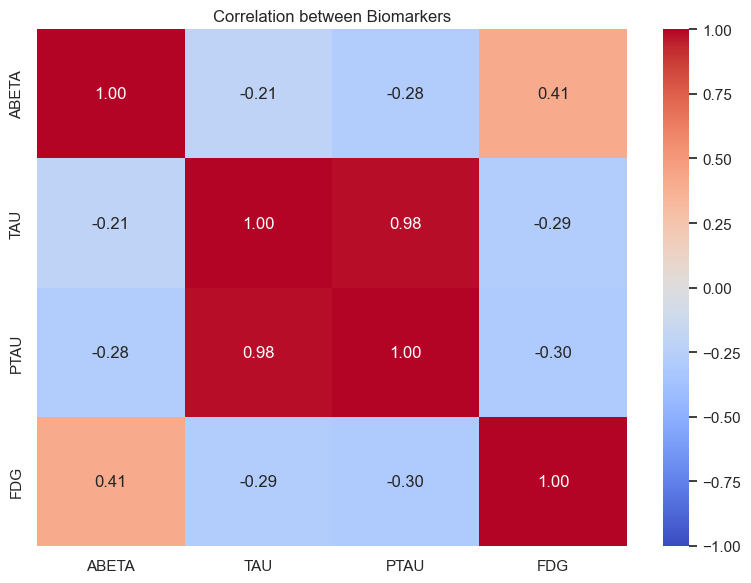

In [11]:
viz.heatmap_corr(cols=["ABETA", "TAU", "PTAU", "FDG"],
                 annot=True, 
                 cmap="coolwarm",
                 title="Correlation between Biomarkers")

We clearly see that `TAU` ​​and `PTAU` are highly correlated (0.98) and therefore convey almost the same information. `TAU` is the total tau protein detected in cerebrospinal fluid (CSF). Tau is a protein that stabilizes neuronal microtubules and [is a nonspecific marker of neurodegeneration (not just Alzheimer"s disease)](https://pmc.ncbi.nlm.nih.gov/articles/PMC3782169). `PTAU` is the phosphorylated fraction of tau and [is considered a more specific biomarker of Alzheimer"s disease](https://pmc.ncbi.nlm.nih.gov/articles/PMC2993973). However, there are no interesting correlations between the other biomarkers.

### Clinical Scores and Composite Scores

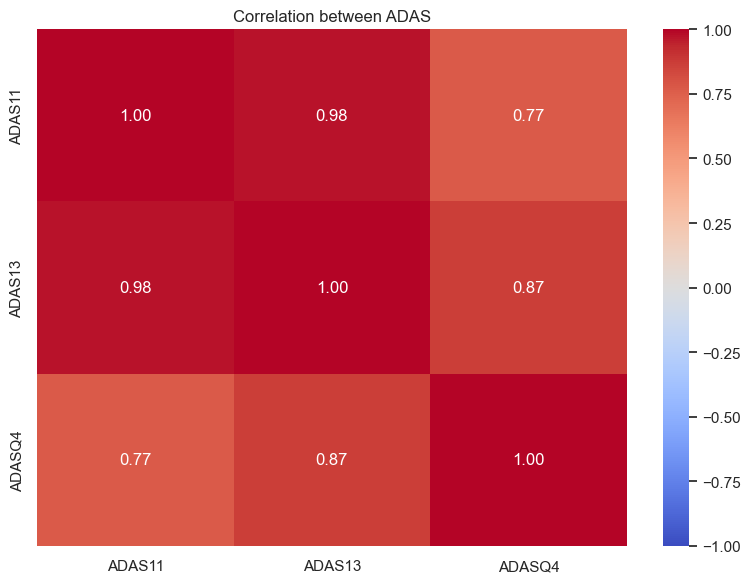

In [12]:
viz.heatmap_corr(cols=["ADAS11", "ADAS13", "ADASQ4"],
                 annot=True, 
                 cmap="coolwarm",
                 title="Correlation between ADAS")

The correlation heatmap within the **ADAS** group clearly shows that `ADAS11` and `ADAS13` are highly overlapping in their signals: the matrix highlights correlation values ​​very close to 1 between the two ADAS versions. `ADASQ4` is also highly correlated with the other two parameters, particularly `ADAS13`.

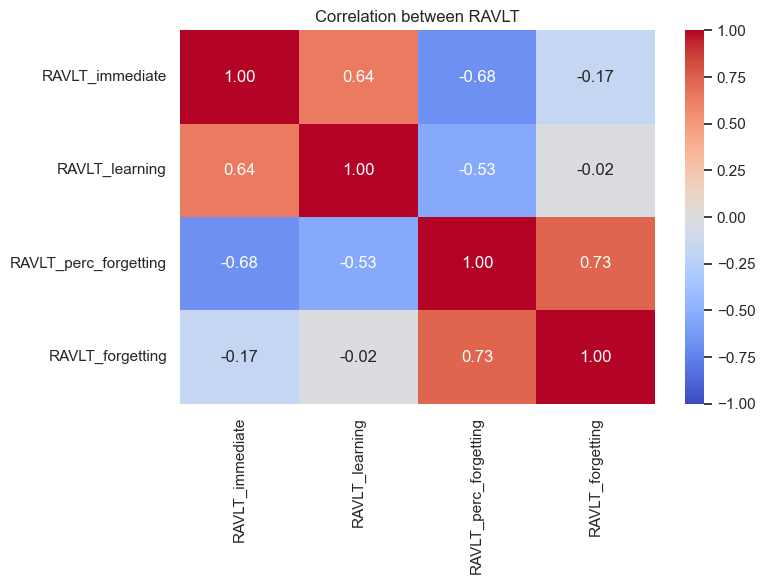

In [13]:
viz.heatmap_corr(cols=["RAVLT_immediate", "RAVLT_learning", "RAVLT_perc_forgetting", "RAVLT_forgetting"],
                 annot=True, 
                 cmap="coolwarm",
                 title="Correlation between RAVLT")

The heatmap of **RAVLT** metrics shows that `RAVLT_immediate`, `RAVLT_learning`, and `RAVLT_perc_forgetting` measures correlate with each other in a manner consistent with the clinical domain (the learning and forgetting components move together). `RAVLT_forgetting` is higly correlated with `RAVLT_perc_forgetting`. 

In [14]:
correlation = dataset["mPACCdigit"].corr(dataset["mPACCtrailsB"])
print(f"Correlation between mPACCdigit and mPACCtrailsB: \t {correlation}")

Correlation between mPACCdigit and mPACCtrailsB: 	 0.9788238864378225


The two **mPACC** are higly correlated, near to 1. 

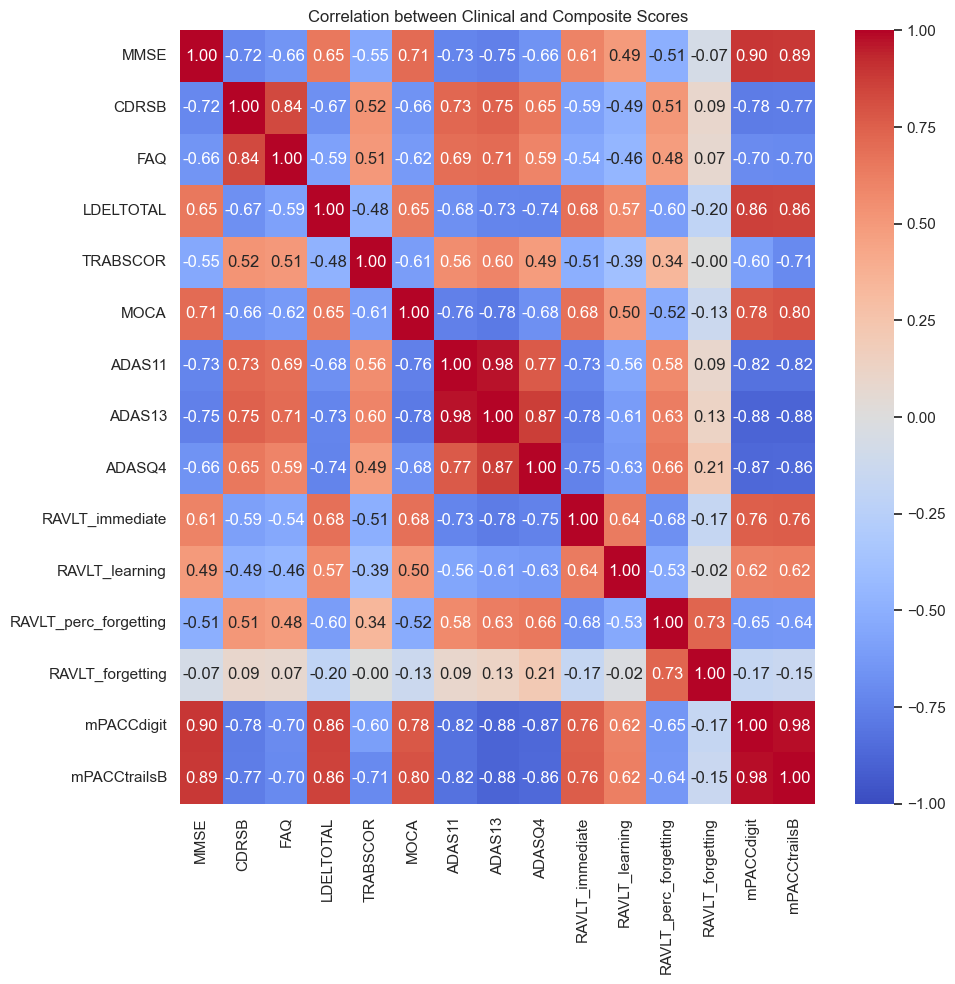

In [15]:
viz.heatmap_corr(cols=["MMSE", "CDRSB","FAQ", "LDELTOTAL", "TRABSCOR", "MOCA", "ADAS11", "ADAS13", "ADASQ4", "RAVLT_immediate", "RAVLT_learning", "RAVLT_perc_forgetting", "RAVLT_forgetting", "mPACCdigit", "mPACCtrailsB"],
                 annot=True, 
                 cmap="coolwarm",
                 fmt=".2f",
                 figsize=(10, 10),
                 title="Correlation between Clinical and Composite Scores")

The heatmap of correlations between all **clinical scores** and **composite scores** shows two distinct patterns. On the one hand, scores measuring clinical worsening (such as `ADAS`, `CDRSB`, and `FAQ`) tend to correlate positively with each other. On the other hand, these same scores are negatively correlated with the `MMSE`, which decreases as the disease progresses. This fairly consistent pattern suggests that the variables naturally organize into subsets.

### Ecog

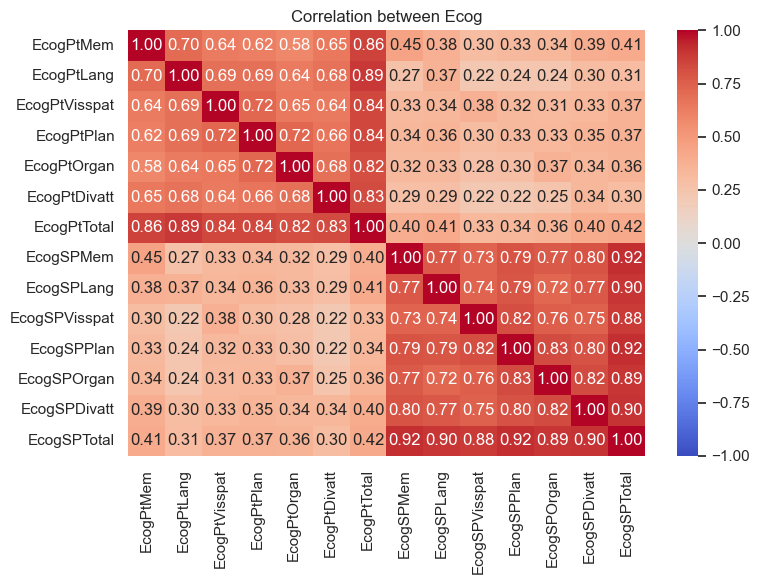

In [16]:
viz.heatmap_corr(cols=["EcogPtMem", "EcogPtLang", "EcogPtVisspat", "EcogPtPlan", "EcogPtOrgan", "EcogPtDivatt", "EcogPtTotal", "EcogSPMem", "EcogSPLang", "EcogSPVisspat", "EcogSPPlan", "EcogSPOrgan", "EcogSPDivatt", "EcogSPTotal"],
                 annot=True, 
                 cmap="coolwarm",
                 title="Correlation between Ecog")

The heatmap of the **Ecog** subscales shows a compact matrix of widespread positive correlations among all self-report and informant-report measures: the scales all point in the same direction and the variability between them is modest.

### MRI

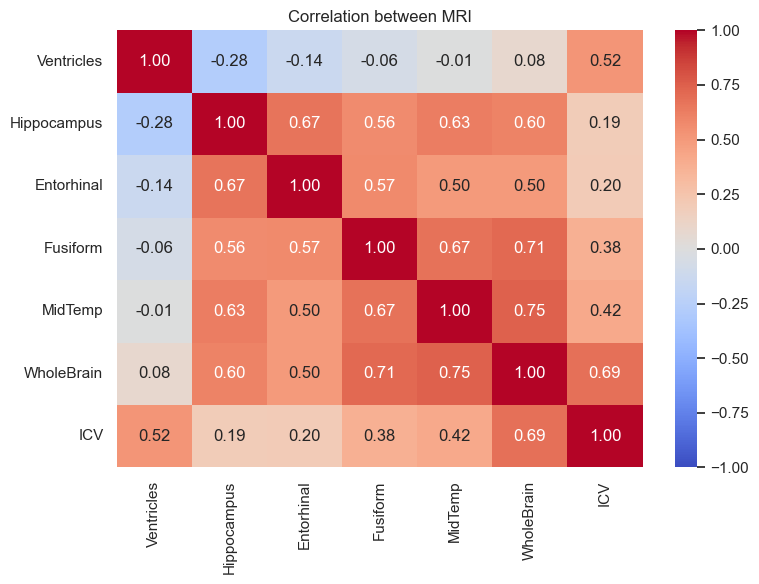

In [17]:
viz.heatmap_corr(cols=["Ventricles", "Hippocampus", "Entorhinal", "Fusiform", "MidTemp", "WholeBrain", "ICV"],
                 annot=True, 
                 cmap="coolwarm",
                 title="Correlation between MRI")

The correlation heatmap between MRI columns (`Ventricles`, `Hippocampus`, `Entorhinal`, `Fusiform`, `MidTemp`, `WholeBrain`, `ICV`) shows moderate/strong positive correlations between many brain volumes and with `ICV`. This indicates that part of the absolute variability of volumes is due to overall cranial size and that volumes should be normalized for `ICV`.

### Final Considerations
*Many features are highly correlated with each other and therefore a* **feature selection** *mechanism is necessary*. Feature selection serves to reduce collinearity, avoid overfitting, and increase clinical interpretability.

## Demographic Analysis

In [ ]:
ct = pd.crosstab(viz.dataset["MARRIED"], viz.dataset["DX_label"], normalize="index")
ct = ct.reindex(columns=["CN", "EMCI", "LMCI", "AD"])
display(ct)


DX_label,CN,EMCI,LMCI,AD
MARRIED,,,,
0,0.456033,0.169734,0.261759,0.112474
1,0.341869,0.175087,0.290657,0.192388


- **Unmarried (0):**
    - **CN = (45.60%):** much higher than married. 
    - **EMCI (16.97%):** similar. 
    - **LMCI (26.18%):** lower than married.
    - **AD (11.25%):** much lower than married. 

- **Married (1):**
    - **CN (34.19%):** lower then unmarried.
    - **EMCI (17.51%):** similar.
    - **LMCI (29.07%):** slightly higher. 
    - **AD (19.24%):** almost double that of unmarried. 

**CN** is more common among the unmarried, and **AD** is much more common among the married. In general, married people in this dataset are more likely to have more severe diagnoses. [Married people tend to be less likely to develop dementia.](https://pubmed.ncbi.nlm.nih.gov/29183957/) although this belief has been questioned by a [recent study](https://pmc.ncbi.nlm.nih.gov/articles/PMC11923573/), for now let's stick with the classical interpretation.

*The conclusion is that, most likely, we are faced with a selection bias on the part of ADNI here and that is why we find many more married people with senile dementia than unmarried ones.*

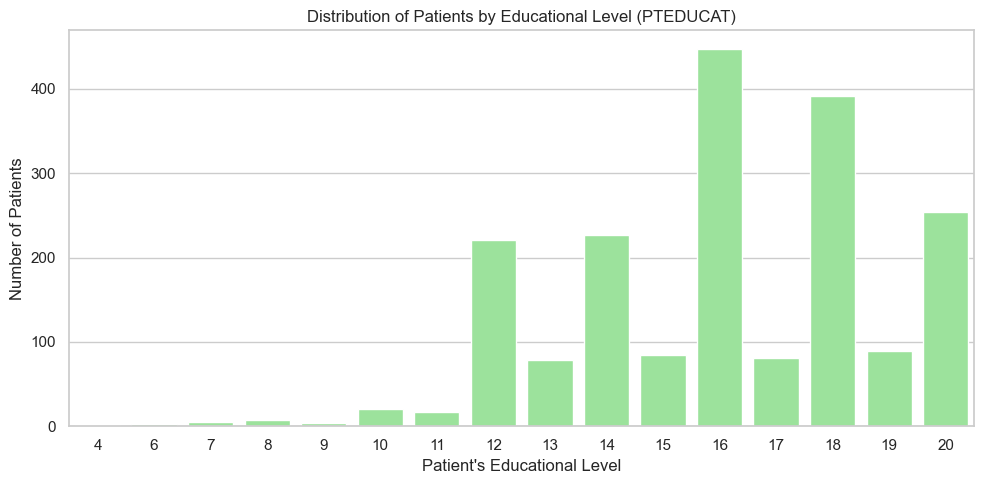

In [19]:
viz.count_plot(
    x="PTEDUCAT",
    figsize=(10, 5),
    color="lightgreen",
    xlabel="Patient's Educational Level",
    ylabel="Number of Patients",
    title="Distribution of Patients by Educational Level (PTEDUCAT)"
)

In [20]:
print(dataset["PTEDUCAT"].value_counts())

PTEDUCAT
16    447
18    392
20    254
14    227
12    221
19     89
15     84
17     81
13     79
10     21
11     17
8       8
7       5
9       4
6       3
4       2
Name: count, dtype: int64


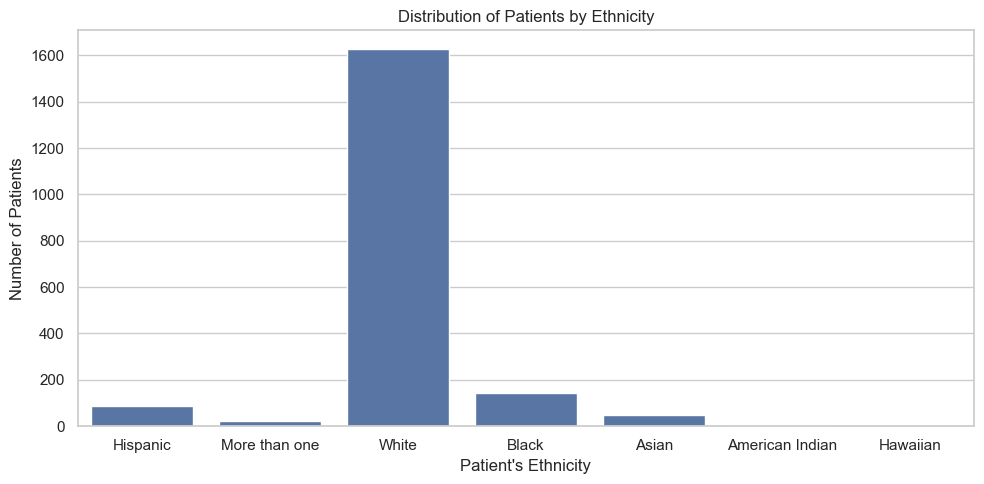

In [21]:
# Map numeric DX codes to diagnosis labels
ethnic_labels = {
    0: "American Indian",    
    1: "Asian", 
    2: "Black", 
    3: "Hawaiian",
    4: "Hispanic",
    5: "More than one",
    6: "White"
}

# Create a new column with the mapped labels
viz.dataset["Ethnic_label"] = viz.dataset["PTETHNICITY"].map(ethnic_labels)

viz.count_plot(
    x="Ethnic_label",
    figsize=(10, 5),
    xlabel="Patient's Ethnicity",
    ylabel="Number of Patients",
    title="Distribution of Patients by Ethnicity"
)

In [22]:
print(viz.dataset["Ethnic_label"].value_counts())

Ethnic_label
White              1626
Black               141
Hispanic             89
Asian                49
More than one        22
American Indian       5
Hawaiian              2
Name: count, dtype: int64


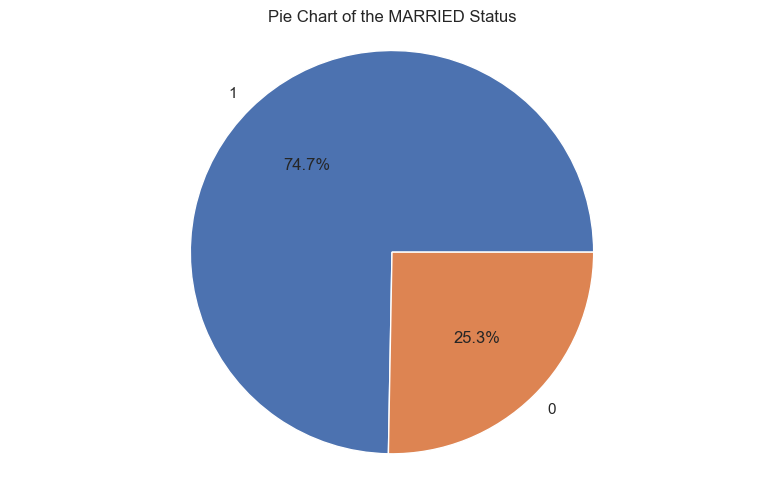

In [23]:
viz.pie_chart(
    x="MARRIED",
    figsize=(8, 5),
    title="Pie Chart of the MARRIED Status"
)

**Here we note a sampling bias in the dataset. [ADNI recruits subjects who are typically well-educated, of medium-to-high socioeconomic status, highly motivated, with white skin, and have access to clinical centers](https://alz-journals.onlinelibrary.wiley.com/doi/10.1002/alz.14159).**

## APOE4 Analysis

In [24]:
dataset.groupby("APOE4")[["ABETA","TAU", "PTAU", "FDG"]].median()

,ABETA,TAU,PTAU,FDG
APOE4,,,,
0.0,1169.00,227.30,19.850,1.23807
1.0,703.05,297.35,28.965,1.17493
2.0,519.70,311.50,31.280,1.13510


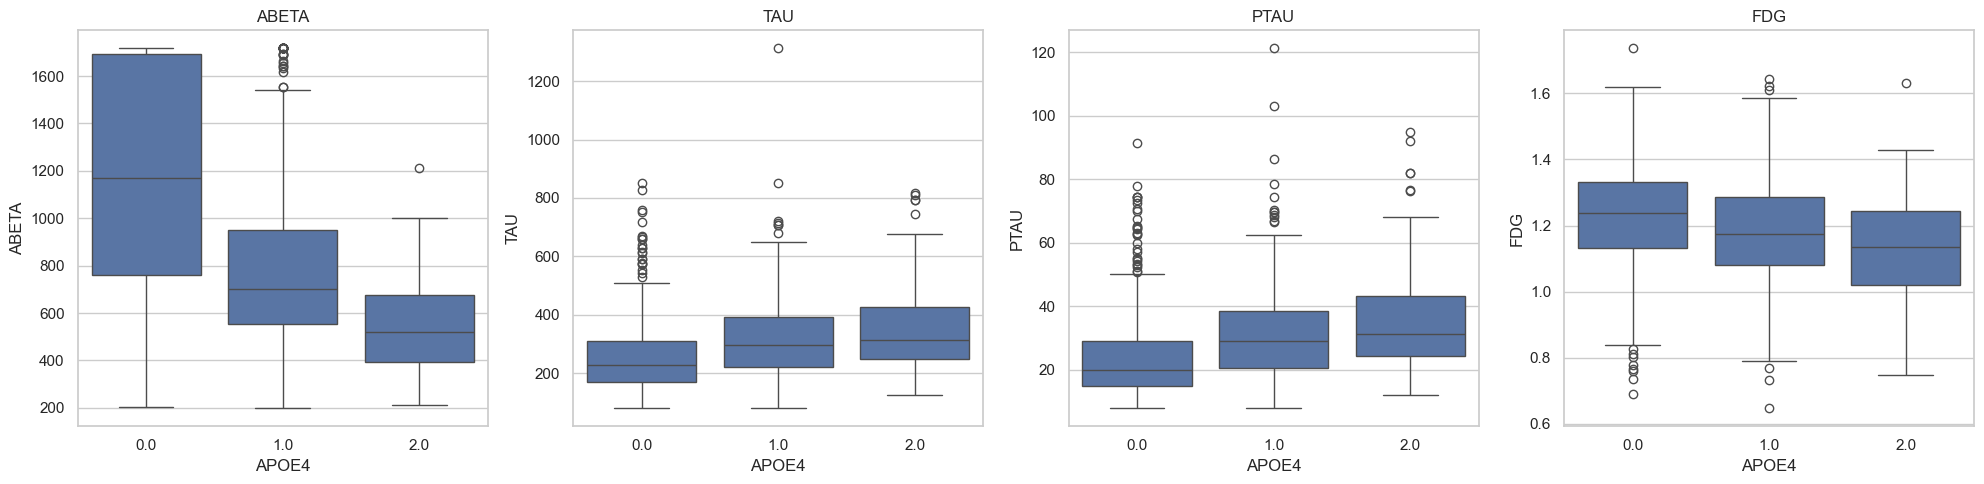

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

sns.boxplot(x="APOE4", y="ABETA", data=dataset, ax=axes[0])
axes[0].set_title("ABETA")

sns.boxplot(x="APOE4", y="TAU", data=dataset, ax=axes[1])
axes[1].set_title("TAU")

sns.boxplot(x="APOE4", y="PTAU", data=dataset, ax=axes[2])
axes[2].set_title("PTAU")

sns.boxplot(x="APOE4", y="FDG", data=dataset, ax=axes[3])
axes[3].set_title("FDG")

plt.tight_layout()
plt.show()

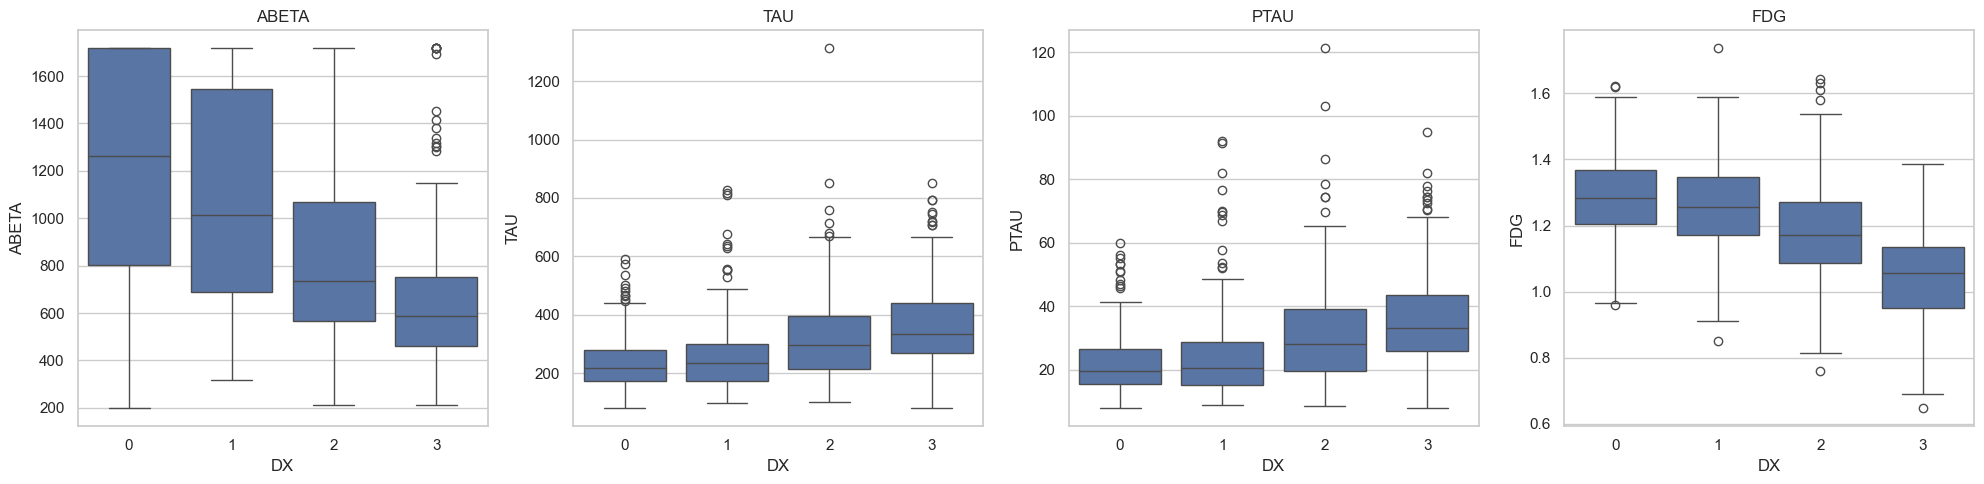

In [26]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

sns.boxplot(x='DX', y="ABETA", data=dataset, ax=axes[0])
axes[0].set_title("ABETA")

sns.boxplot(x='DX', y="TAU", data=dataset, ax=axes[1])
axes[1].set_title("TAU")

sns.boxplot(x='DX', y="PTAU", data=dataset, ax=axes[2])
axes[2].set_title("PTAU")

sns.boxplot(x='DX', y="FDG", data=dataset, ax=axes[3])
axes[3].set_title("FDG")

plt.tight_layout()
plt.show()

The series of boxplots plotting `ABETA`, `TAU`, `PTAU`, and `FDG` as a function of the number of `APOE4` alleles clearly shows a dose-response effect: the median of ABETA drops sharply from APOE4 = 0 (median ≈ 1169) to 1 (≈ 703) to 2 (≈ 519), while TAU and PTAU increase with the number of alleles (median `TAU` ≈ 227 → 297 → 311; median `PTAU` ≈ 19.85 → 28.97 → 31.28) and `FDG` shows a slight decrease. The boxplots also reveal large overlap and outliers, thus `APOE4` is a strong associated factor but not sufficient alone to separate phenotypes and should be used in conjunction with other measures to model risk. In short, all this confirms what we expected. Furthermore, it moves in a similar manner and follows the `DX` pattern. However, the `DX` plots also show a large overlap of distributions between classes, implying that single biomarkers have limited discriminatory power and that the multimodal combination (Biomarkers + MRI + cognitive scores) will likely be necessary for satisfactory predictive performance.

## MRI Analysis by Gender

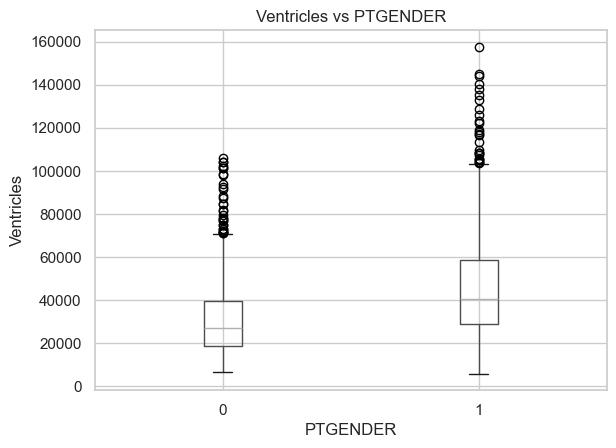

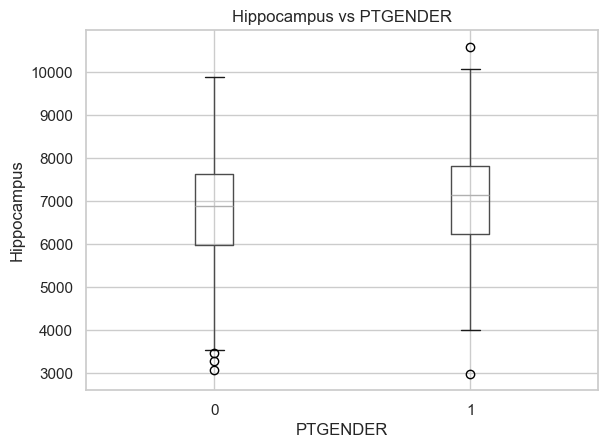

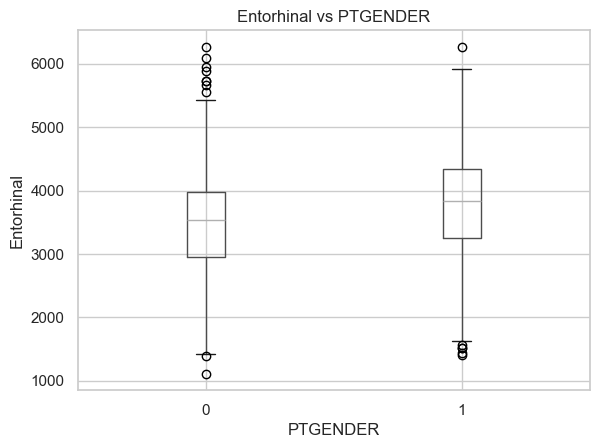

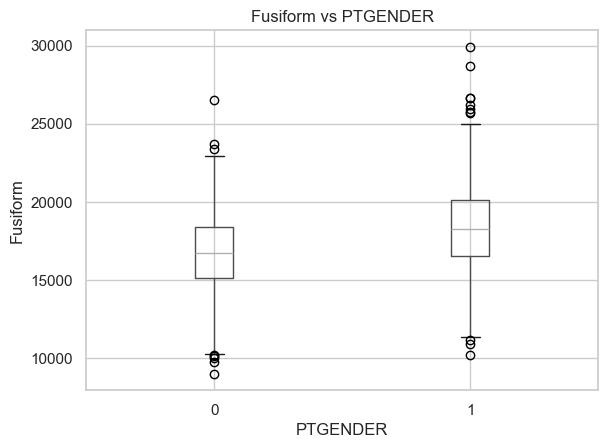

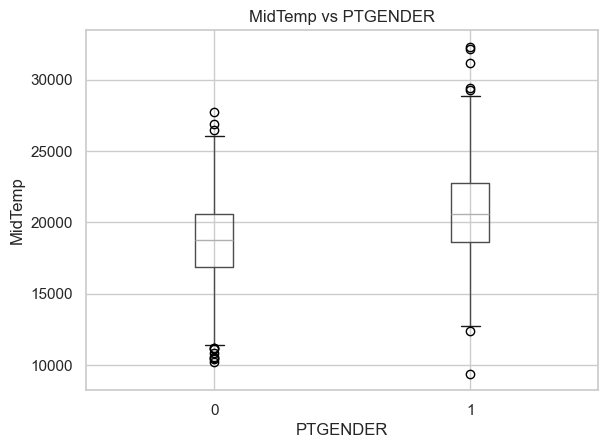

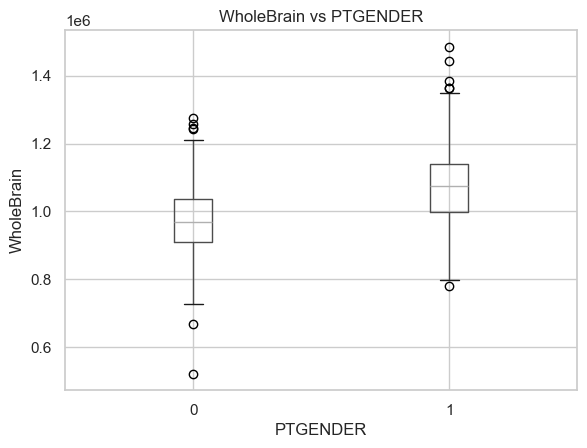

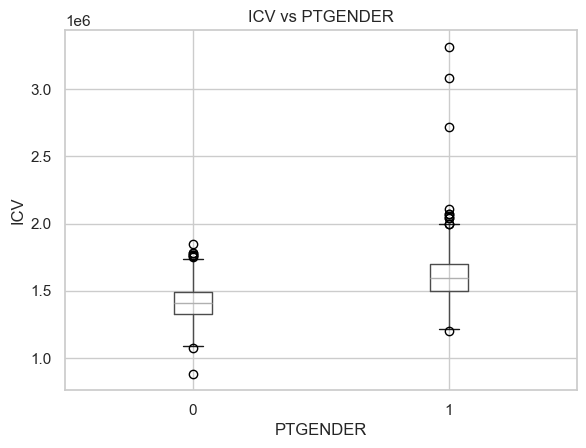

In [27]:
mri_cols = ["Ventricles", "Hippocampus", "Entorhinal", "Fusiform", "MidTemp", "WholeBrain", "ICV"]

for col in mri_cols:
    dataset.boxplot(column=col, by="PTGENDER")
    plt.title(f"{col} vs PTGENDER")
    plt.suptitle("")
    plt.xlabel("PTGENDER")
    plt.ylabel(col)
    plt.show()
    

Boxplots of separate **MRI** volumes for `PTGENDER` show systematic differences in scale between gender groups, with one gender having higher absolute volume means and medians across nearly all included *region of interests*. This visual pattern highlights the need to normalize volumes for `ICV`.

## Diagnosys Analysis

We will see how the baseline diagnoses are distributed among the patients in the dataset.

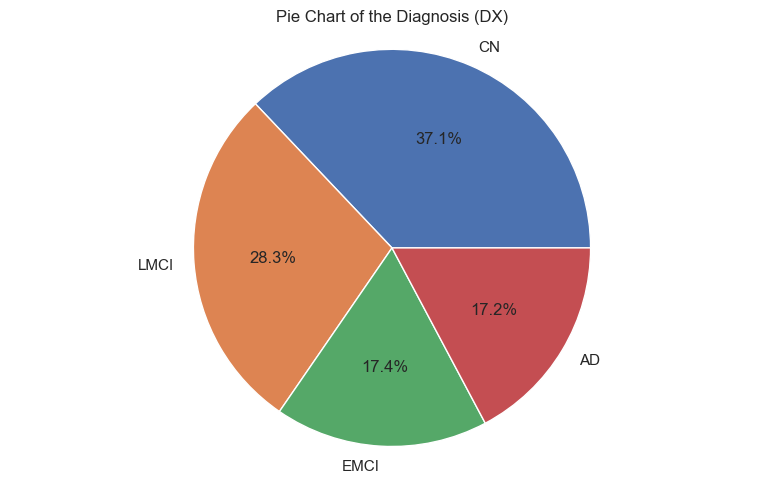

In [28]:
viz.pie_chart(
    x="DX_label",
    figsize=(8, 5),
    title="Pie Chart of the Diagnosis (DX)"
)

In [29]:
print(dataset['DX'].value_counts())

DX
0    717
2    548
1    336
3    333
Name: count, dtype: int64
